KNN

In [4]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt

In [5]:
# Load and separation of data
path_to_train = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz'
path_to_test = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz'

training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None)) 
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]


The program has the best accuracy of 94.46936 percent for k = 3


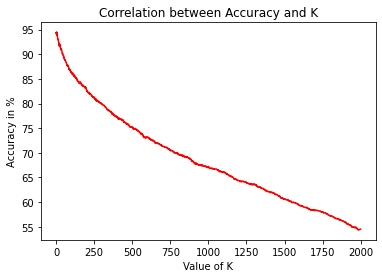

The Runtime of the Program are 203.58 sec.


All or only the first 90 images that are marked as incorrect are shown below.


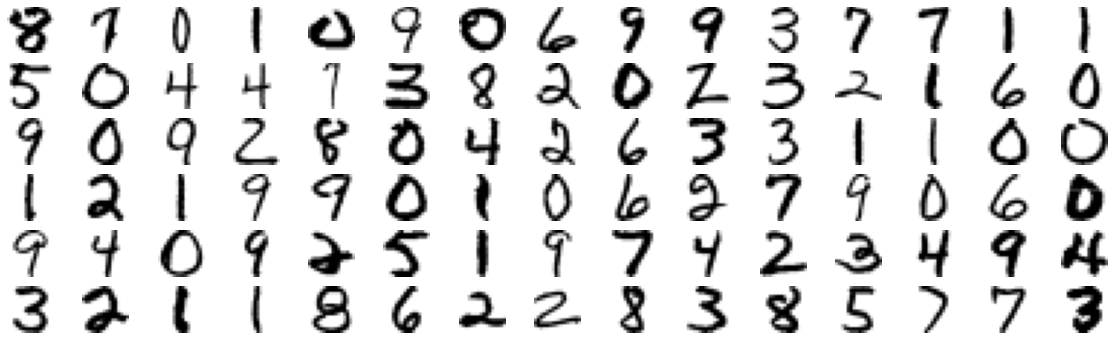

In [6]:
class KNearestNeighbors():
    def squared_euclidean_distance(self, x_1, x_2):
      return np.sum((x_1-x_2)**2, axis = 1)
    # TODO: Find solution, to replace the sort of the two seperated lists with a sort of two  nparrays 
    def mergeSort(self,nparr1, nparr2) -> ([float]):
      global all_sorted_Distances  
      arr1 = nparr1.tolist()
      arr2 = nparr2.tolist()
      def help_mergeSort(arr1,arr2): # MergeSort; arr1 is the key list; arr2 is sorted like arr1
        if len(arr1) > 1:
          mid = len(arr1) // 2
          L1, L2 = arr1[:mid], arr2[:mid]
          R1, R2 = arr1[mid:], arr2[mid:]
          help_mergeSort(L1, L2)
          help_mergeSort(R1, R2)
          i = j = k = 0
          while i < len(L1) and j < len(R1):
            if L1[i] < R1[j]:
              arr1[k], arr2[k] = L1[i],L2[i]
              i += 1
            else:
              arr1[k], arr2[k] = R1[j], R2[j]
              j += 1
            k += 1
          while i < len(L1):
            arr1[k],arr2[k]  = L1[i],L2[i]
            i += 1
            k += 1
          while j < len(R1):
            arr1[k],arr2[k] = R1[j],R2[j]
            j += 1
            k += 1
      help_mergeSort(arr1, arr2)
      # np_array of all distances individually sorted 
      all_sorted_Distances = np.append(all_sorted_Distances, arr2) 
      return arr2

    # Calculates the best Accuracy with k = 3 and creates the np_array indices,
    # with all as wrong marked numbers for k = 3 (later used for show_wrong_Num).
    def kNN_Accuracy(self, X_train, X_test, y_train, y_test, k, lenOfUsedX_testData, allDistances) -> (float):
      global indices
      count, start = 0, 0
      end = len(X_train)
      for x in range(0, lenOfUsedX_testData):  
        arr2 = self.mergeSort(allDistances[start: end], y_train)
        arr2 = np.array(arr2[:k])
        arr2 = arr2.astype(int) 
        # bincount is a function of np, input: np_arrray of int's output: element that appears the most in the array
        # if two elements appear equal, shows the element of the first appearance   
        kNN_of_x = np.bincount(arr2).argmax()
        start = end
        end += len(X_train)
        if kNN_of_x == y_test[x]:
          count += 1
        else:
          indices = np.append(indices, x)
      return round(((100/lenOfUsedX_testData)*count), 5)
    
    # calculates the accuracy of all k's and returns this value in a np array
    def best_k(self, X_train, y_test, max_k) ->([float]):
      global all_sorted_Distances  
      start, count = 0, 0
      end = len(X_train)
      accuracy_of_all_k = np.array([])
      for k in range(1,max_k):
        for x in range(0, lenOfUsedX_testData):
          arr2 = all_sorted_Distances[start:start+k]
          arr2 = arr2.astype(int)
          kNN_of_x = np.bincount(arr2).argmax()
          if kNN_of_x == (int) (y_test[x]):
            count += 1
          start = end
          end += len(X_train)
        accuracy_of_all_k = np.append(accuracy_of_all_k, (100/lenOfUsedX_testData)*count)
        start, count = 0, 0
        end   = len(X_train)
      return accuracy_of_all_k
    
    # All or only the first 90 images that are marked as incorrect are shown
    def show_wrong_Num(self, X_train, X_test, y_train, k, indices ):
      if len(indices) > 90:
        num_samples = 90
      else:
        num_samples = len(indices)
      indices = indices.astype(int)
      sample_digits = X_train[indices]
      fig = plt.figure(figsize=(20, 6))
      for i in range(num_samples):
          ax = plt.subplot(6, 15, i + 1)
          img = 1 - sample_digits[i].reshape((16, 16))
          plt.imshow(img, cmap='gray')
          plt.axis('off')

    # creates a np array, with all distances of all X_test[x] sets
    def calculateDistanceForAllX_test(self, X_train, X_test, lenOfUsedX_testData) -> ([float]):
      allDistances = np.array([])
      for x in range(0, lenOfUsedX_testData):
        distancesForAX_test = self.squared_euclidean_distance(X_train, X_test[x]) 
        allDistances = np.append(allDistances, distancesForAX_test)
      return allDistances
    

    def k_NearestNeighbors(self, X_train, X_test, y_train, y_test ,k, max_k, lenOfUsedX_testData):
      global indices
      start_time = time.time()
      allDistances = self.calculateDistanceForAllX_test(X_train, X_test, lenOfUsedX_testData)
      print("The program has the best accuracy of %s percent for k = 3" % self.kNN_Accuracy(X_train, X_test, y_train, y_test, k, lenOfUsedX_testData, allDistances) )
      y = self.best_k(X_train, y_test, max_k)
      x = np.arange(1, max_k)
      plt.title("Correlation between Accuracy and K")  
      plt.xlabel("Value of K")  
      plt.ylabel("Accuracy in %")  
      plt.plot(x, y, color ="red")  
      plt.show()
      self.show_wrong_Num( X_train, X_test, y_train, k, indices )
      print("The Runtime of the Program are %s sec." % round((time.time() - start_time),2))
      print("\n")
      print("All or only the first 90 images that are marked as incorrect are shown below.")  # For k = 3
      return 
            
kNN = KNearestNeighbors()
all_sorted_Distances, indices = np.array([]), np.array([])
# number of test sets that are used 
lenOfUsedX_testData = len(X_test)
# k of the best accuracy used for the first print statement 
k = 3
# 1 to max_k all accuracies a calculated and later shown in the graph  
max_k = 2000
kNN.k_NearestNeighbors(X_train, X_test, y_train, y_test, k, max_k, lenOfUsedX_testData)